In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
def apply_iqr_capping(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Primjena cappinga
    # Sve vrijednosti manje od donje granice postaju donja granica
    # Sve vrijednosti veće od gornje granice postaju gornja granica
    capped_series = series.clip(lower=lower_bound, upper=upper_bound)
    return capped_series

## Učitavanje datoteke

In [3]:
banka = pd.read_csv ("projektbanka.csv")

In [4]:
banka

,ID_Klijenta,Država,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
0,1001,Hrvatska,94934.28,5897.21,45000.00,28.0,12.0,9.0,2.0,muško,podstanar,SSS
1,1002,Hrvatska,82234.71,5466.71,45000.00,34.0,13.0,23.0,3.0,žensko,podstanar,SSS
2,1003,Hrvatska,97953.77,9539.26,45000.00,27.0,11.0,16.0,2.0,muško,podstanar,magisterij
3,1004,Hrvatska,115460.60,9433.69,39059.44,32.0,17.0,30.0,4.0,f,podstanar,VSS
4,1005,Hrvatska,80316.93,4671.03,45000.00,18.0,10.0,NaN,2.0,f,podstanar,SSS
...,...,...,...,...,...,...,...,...,...,...,...,...
2015,2658,Hrvatska,111351.95,7401.28,27290.05,18.0,2.0,9.0,1.0,f,podstanar,SSS
2016,1873,Hrvatska,57413.62,3205.30,45000.00,18.0,0.0,8.0,6.0,žensko,podstanar,SSS
2017,2703,Hrvatska,97694.43,9542.15,45000.00,26.0,13.0,25.0,1.0,m,vlasnik,magisterij
2018,1528,Hrvatska,85961.70,6112.71,45000.00,41.0,19.0,21.0,4.0,M,vlasnik,SSS


In [5]:
banka.head ()

,ID_Klijenta,Država,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
0,1001,Hrvatska,94934.28,5897.21,45000.00,28.0,12.0,9.0,2.0,muško,podstanar,SSS
1,1002,Hrvatska,82234.71,5466.71,45000.00,34.0,13.0,23.0,3.0,žensko,podstanar,SSS
2,1003,Hrvatska,97953.77,9539.26,45000.00,27.0,11.0,16.0,2.0,muško,podstanar,magisterij
3,1004,Hrvatska,115460.60,9433.69,39059.44,32.0,17.0,30.0,4.0,f,podstanar,VSS
4,1005,Hrvatska,80316.93,4671.03,45000.00,18.0,10.0,NaN,2.0,f,podstanar,SSS


#### Prikazano je prvih 5 redaka tablice
#### U tablici se nalaze ID klijenta, država, odobreni iznos kredita u eurima, mjesečna primanja u eurima, trenutni dug u eurima, starost klijenta, godine staža, godine kreditne povijesti, broj članova kućanstva, spol klijenta, stambeni status te razina obrazovanja.

In [6]:
banka.describe ()

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva
count,2020.000000,2020.000000,1919.000000,1919.00000,1919.000000,1919.000000,1919.000000,1919.000000
mean,2000.603465,85929.815401,6694.880573,43534.26522,35.178739,15.392392,15.137051,2.647212
std,576.920116,19750.659531,1838.166648,5928.30992,9.854248,5.660518,8.801156,1.587254
min,1001.000000,20174.650000,1644.560000,0.00000,12.000000,0.000000,0.000000,-5.000000
25%,1502.750000,72694.725000,5467.530000,45000.00000,28.000000,11.000000,8.000000,1.000000
50%,2002.500000,85893.835000,6618.190000,45000.00000,35.000000,15.000000,15.000000,2.000000
75%,2498.250000,98722.072500,7935.160000,45000.00000,42.000000,19.000000,23.000000,4.000000
max,3000.000000,150000.000000,19246.942762,96932.52968,100.000000,37.000000,30.000000,9.000000


#### U gornjoj tablici vidimo da ID klijenta i odobreni iznos kredita u eurima imaju 2020 redaka u tablici, dok ostale varijable imaju 1919 redaka (što znači da ćemo to trebati popraviti).
#### Također, za brojčane varijable, vidimo prosjek, standardnu devijaciju, minimum, maksimum te 25i, 50i i 75i centil.
#### Iz ove tablice možemo pročitati sumnjive vrijednosti, koj ećemo još provjeriti. Na primjer, dob osobe koja ima 12 godina te dob osobe koja ima 100 godina. Isto tako kućanstvo ne može imati negativan broj članova.

In [7]:
banka.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Klijenta                2020 non-null   int64  
 1   Država                     2020 non-null   object 
 2   Odobreni_Iznos_EUR         2020 non-null   float64
 3   Mjesečna_Primanje_EUR      1919 non-null   float64
 4   Trenutni_Dug_EUR           1919 non-null   float64
 5   Starost_Klijenta           1919 non-null   float64
 6   Staž_Godine                1919 non-null   float64
 7   Godine_Kreditne_Povijesti  1919 non-null   float64
 8   Broj_članova_Kućanstva     1919 non-null   float64
 9   Spol                       1919 non-null   object 
 10  Stambeni_Status            1919 non-null   object 
 11  Obrazovanje                1919 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 189.5+ KB


#### Iz gornje tablice vidimo da tablica ima 12 stupaca te koliko koji stupac tablice ima redaka. Vidimo da nema null vrijednosti te tipove varijabli. ID klijenta je cijeli broj. Odobreni iznos kredita u eurima, mjesečna primanja u eurima, trenutni dug u eurima, starost klijenta, godine staža, godine kreditne povijesti, broj članova kućanstva su decimalni brojevi, a ostale varijable su objekti.

## Provjera i brisanje duplikata

In [8]:
banka.duplicated().sum()

12

In [9]:
banka = banka.drop_duplicates()

In [10]:
banka.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 2008 entries, 0 to 2019
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Klijenta                2008 non-null   int64  
 1   Država                     2008 non-null   object 
 2   Odobreni_Iznos_EUR         2008 non-null   float64
 3   Mjesečna_Primanje_EUR      1907 non-null   float64
 4   Trenutni_Dug_EUR           1907 non-null   float64
 5   Starost_Klijenta           1907 non-null   float64
 6   Staž_Godine                1907 non-null   float64
 7   Godine_Kreditne_Povijesti  1907 non-null   float64
 8   Broj_članova_Kućanstva     1907 non-null   float64
 9   Spol                       1907 non-null   object 
 10  Stambeni_Status            1907 non-null   object 
 11  Obrazovanje                1907 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 203.9+ KB


#### U tablici je bilo 12 duplikata, to smo obrisali i sada nam nova tablica ima 2008 redaka

## Provjera i ispravak krivih upisa

In [11]:
banka.Država.value_counts ()

Država
Hrvatska    2008
Name: count, dtype: int64

#### Svi klijenti su iz Hrvatske, nema potrebe išta popravljati

In [12]:
banka.Spol.value_counts ()

Spol
muško     723
M         417
m         361
f         219
žensko    187
Name: count, dtype: int64

#### Varijabla spol je napisana na 5 različitih načina. To ćemo popraviti tako što ćemo zamijeniti muško i m tako da za sve muške osobe u tablici imamo varijablu M, a žensko i f ćemo zamijeniti, tako da sve osobe ženskog spola budu označene sa Ž

In [13]:
banka ["Spol"] = banka ["Spol"].replace ({"muško":"M", "m":"M", "f":"Ž", "žensko":"Ž"})

C:\Users\Glorija\AppData\Local\Temp\ipykernel_32700\1901667622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banka ["Spol"] = banka ["Spol"].replace ({"muško":"M", "m":"M", "f":"Ž", "žensko":"Ž"})


In [14]:
banka.Spol.value_counts ()

Spol
M    1501
Ž     406
Name: count, dtype: int64

#### Nakon što smo uredili varijablu spol, vidimo da je uključeno 1501 muškaracai 406 žena. Dakle, prevladavaju muški klijenti.

In [15]:
banka.Stambeni_Status.value_counts ()

Stambeni_Status
podstanar    1161
vl            383
vlasnik       363
Name: count, dtype: int64

#### Obzirom na različiti način označavanja varijable stambeni status, ispraviti ćemo oznaku vl u vlasnik.

In [16]:
banka ["Stambeni_Status"] = banka ["Stambeni_Status"].replace ({"vl":"vlasnik"})

C:\Users\Glorija\AppData\Local\Temp\ipykernel_32700\3628094034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banka ["Stambeni_Status"] = banka ["Stambeni_Status"].replace ({"vl":"vlasnik"})


In [17]:
banka.Stambeni_Status.value_counts ()

Stambeni_Status
podstanar    1161
vlasnik       746
Name: count, dtype: int64

#### Nakon uređivanja varijable stambeni status, vidimo da je većina klijenata banke u statusu podstanara, njih 1161, dok preostalih 746 klijenata ima vlastitu nekretninu.

In [18]:
banka.Obrazovanje.value_counts ()

Obrazovanje
SSS           970
VSS           661
magisterij    276
Name: count, dtype: int64

#### Kako je magisterij isto što i visoka škola, oznaku magisterij ćemo preimenovati u VSS.

In [19]:
banka ["Obrazovanje"] = banka ["Obrazovanje"].replace ({"magisterij":"VSS"})

C:\Users\Glorija\AppData\Local\Temp\ipykernel_32700\508701932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banka ["Obrazovanje"] = banka ["Obrazovanje"].replace ({"magisterij":"VSS"})


In [20]:
banka.Obrazovanje.value_counts ()

Obrazovanje
SSS    970
VSS    937
Name: count, dtype: int64

#### Podjednako je klijenata banke koji su završili srednju školu i fakultet.

# PROVJERA I ISPRAVAK NEDOSTAJUĆIH VRIJEDNOSTI

## Popunjavanje nedostajućih vrijednosti

In [21]:
banka.isna().sum()

ID_Klijenta                    0
Država                         0
Odobreni_Iznos_EUR             0
Mjesečna_Primanje_EUR        101
Trenutni_Dug_EUR             101
Starost_Klijenta             101
Staž_Godine                  101
Godine_Kreditne_Povijesti    101
Broj_članova_Kućanstva       101
Spol                         101
Stambeni_Status              101
Obrazovanje                  101
dtype: int64

#### U svim stupcima, osim ID klijenta, države i odobrenog iznosa kredita u eurima, nedostaje po 101 podatak

In [22]:
isna_values = banka[banka.isna().any(axis=1)]

In [23]:
isna_values

,ID_Klijenta,Država,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
4,1005,Hrvatska,80316.93,4671.03,45000.0,18.0,10.0,NaN,2.0,Ž,podstanar,SSS
8,1009,Hrvatska,75610.51,4796.56,45000.0,42.0,17.0,24.0,5.0,M,NaN,SSS
9,1010,Hrvatska,95851.20,6706.74,45000.0,44.0,23.0,4.0,NaN,M,podstanar,SSS
27,1028,Hrvatska,92513.96,9037.70,45000.0,47.0,22.0,6.0,3.0,Ž,NaN,VSS
29,1030,Hrvatska,79166.13,8678.81,45000.0,30.0,13.0,12.0,NaN,M,vlasnik,VSS
...,...,...,...,...,...,...,...,...,...,...,...,...
2002,1899,Hrvatska,109130.18,9110.80,45000.0,NaN,12.0,22.0,3.0,M,podstanar,VSS
2003,2679,Hrvatska,104966.22,10000.00,45000.0,47.0,NaN,30.0,1.0,M,podstanar,VSS
2011,1015,Hrvatska,50501.64,NaN,45000.0,43.0,17.0,2.0,4.0,Ž,vlasnik,SSS
2014,2258,Hrvatska,93380.38,8856.01,45000.0,28.0,9.0,0.0,4.0,M,NaN,NaN


#### Prikaz tablice sa nedostajućim vrijednostima. Nedostajućih vrijednosti imamo u ukupno 751 retku.

## MJESEČNA PRIMANJA

#### Popunjavamo nedostajuće vrijednosti za varijablu Mjesečna_Primanje_EUR. To ćemo učiniti pomoću prosjeka. Prvo ćemo stvoriti kopiju trenutnog dataseta kako ne bismo uništili osnovne podatke.

In [24]:
banka2 = banka.copy()

In [25]:
prosjek_mj_primanja = banka2 ["Mjesečna_Primanje_EUR"].mean()

In [26]:
prosjek_mj_primanja

6695.73291584802

In [27]:
banka2 ["Mjesečna_Primanje_EUR"].fillna (prosjek_mj_primanja, inplace = True)

C:\Users\Glorija\AppData\Local\Temp\ipykernel_32700\27459581.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  banka2 ["Mjesečna_Primanje_EUR"].fillna (prosjek_mj_primanja, inplace = True)


#### Popunili smo nedostajuće vrijednosti mjesečnih primanja.

In [28]:
banka2.isna().sum()

ID_Klijenta                    0
Država                         0
Odobreni_Iznos_EUR             0
Mjesečna_Primanje_EUR          0
Trenutni_Dug_EUR             101
Starost_Klijenta             101
Staž_Godine                  101
Godine_Kreditne_Povijesti    101
Broj_članova_Kućanstva       101
Spol                         101
Stambeni_Status              101
Obrazovanje                  101
dtype: int64

## TERNUTNI DUG

#### Prilikom popunjavanja nedostajućih vrijednosti za varijablu Trenutni_Dug_EUR želim pripaziti da trenutni dug ne bude veći od Odobreni_Iznos_EUR jer to ne bi imalo smisla.

In [29]:
banka2[banka2['Trenutni_Dug_EUR'] > banka2['Odobreni_Iznos_EUR']][['ID_Klijenta', 'Odobreni_Iznos_EUR', 'Trenutni_Dug_EUR']]

,ID_Klijenta,Odobreni_Iznos_EUR,Trenutni_Dug_EUR
74,1075,32605.10,45000.000000
236,1237,44497.15,45000.000000
262,1263,20174.65,45000.000000
382,1383,42522.09,45000.000000
431,1432,44215.36,45000.000000
442,1443,43651.16,45000.000000
444,1445,58910.61,96932.529680
471,1472,38961.58,45000.000000
544,1545,35567.11,45000.000000
566,1567,44237.51,45000.000000


#### Postoji 38 redaka u kojima je trenutni dug veći od ukupnog duga pa ću te vrijednosti postaviti na NaN vrijednost, a onda kasnije popuniti

In [30]:
banka2.loc[banka2['Trenutni_Dug_EUR'] > banka2['Odobreni_Iznos_EUR'], 'Trenutni_Dug_EUR'] = np.nan
#u tablici banka2 provjeravamo je li trenutni dug veći od odobrenog iznosa kredita 
#te ako je vrijednost varijable trenutni dug postavljamo na NaN vrijednost

In [31]:
banka2.isna().sum()

ID_Klijenta                    0
Država                         0
Odobreni_Iznos_EUR             0
Mjesečna_Primanje_EUR          0
Trenutni_Dug_EUR             139
Starost_Klijenta             101
Staž_Godine                  101
Godine_Kreditne_Povijesti    101
Broj_članova_Kućanstva       101
Spol                         101
Stambeni_Status              101
Obrazovanje                  101
dtype: int64

#### Sada nam se broj NaN vrijednosti varijable trenutni dug povećano na 139

In [32]:
banka2['Omjer_Dug_Kredit'] = banka2['Trenutni_Dug_EUR'] / banka2['Odobreni_Iznos_EUR']
#dodajemo novi stupac omjer duga i odobrenog kredita jer će mi tako biti lakše popuniti nedostajuće vrijednosti,
#ako bih popunila sa medijanom ili prosjekom opet bi se moglo dogoditi da vrijednost duga bude veća od kredita, 
#ovako ću osigurati da dug bude manji od kredita

In [33]:
prosjecni_omjer = banka2['Omjer_Dug_Kredit'].mean(skipna=True)
#računam prosjek za varijablu omjer duga i kredita

In [34]:
banka2['Trenutni_Dug_EUR'].fillna(banka2['Odobreni_Iznos_EUR'] * prosjecni_omjer, inplace=True)
#NaN vrijednosti popunjavanjavam prosječnim omjerom duga i kredita

C:\Users\Glorija\AppData\Local\Temp\ipykernel_32700\3646782585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  banka2['Trenutni_Dug_EUR'].fillna(banka2['Odobreni_Iznos_EUR'] * prosjecni_omjer, inplace=True)


In [35]:
banka2[banka2['Trenutni_Dug_EUR'] > banka2['Odobreni_Iznos_EUR']][['ID_Klijenta', 'Odobreni_Iznos_EUR', 'Trenutni_Dug_EUR']]

,ID_Klijenta,Odobreni_Iznos_EUR,Trenutni_Dug_EUR


In [36]:
banka2.isna().sum()

ID_Klijenta                    0
Država                         0
Odobreni_Iznos_EUR             0
Mjesečna_Primanje_EUR          0
Trenutni_Dug_EUR               0
Starost_Klijenta             101
Staž_Godine                  101
Godine_Kreditne_Povijesti    101
Broj_članova_Kućanstva       101
Spol                         101
Stambeni_Status              101
Obrazovanje                  101
Omjer_Dug_Kredit             139
dtype: int64

#### Kako je vidljivo iz prethodnog, popunjene su sve vrijednosti za varijablu Trenutni_Dug_EUR i nema više niti jedne koja je veća od odobrenog kredita

#### Obzirom da mi više nije potrebna varijabla omjer duga i kredita, nju ću obrisati

In [37]:
banka2.drop(columns=['Omjer_Dug_Kredit'], inplace=True)

In [38]:
banka2

,ID_Klijenta,Država,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
0,1001,Hrvatska,94934.28,5897.210000,45000.00,28.0,12.0,9.0,2.0,M,podstanar,SSS
1,1002,Hrvatska,82234.71,5466.710000,45000.00,34.0,13.0,23.0,3.0,Ž,podstanar,SSS
2,1003,Hrvatska,97953.77,9539.260000,45000.00,27.0,11.0,16.0,2.0,M,podstanar,VSS
3,1004,Hrvatska,115460.60,9433.690000,39059.44,32.0,17.0,30.0,4.0,Ž,podstanar,VSS
4,1005,Hrvatska,80316.93,4671.030000,45000.00,18.0,10.0,NaN,2.0,Ž,podstanar,SSS
...,...,...,...,...,...,...,...,...,...,...,...,...
2007,2022,Hrvatska,73526.00,4534.170000,45000.00,30.0,17.0,28.0,1.0,M,podstanar,SSS
2009,2133,Hrvatska,117274.23,8014.600000,38649.07,18.0,9.0,26.0,4.0,Ž,vlasnik,SSS
2011,1015,Hrvatska,50501.64,6695.732916,45000.00,43.0,17.0,2.0,4.0,Ž,vlasnik,SSS
2014,2258,Hrvatska,93380.38,8856.010000,45000.00,28.0,9.0,0.0,4.0,M,NaN,NaN


In [39]:
banka2['Trenutni_Dug_EUR'].isnull().sum()

0

#### Riješili smo sve nedostajuće vrijednosti varijable trenutni dug te izbrisali stupac koji nam više nije bio potreban.

# STAROST KLIJENTA

#### Prilikom popunjavanja nedostajućih vrijednosti za varijablu Starost_Klijenta želim pripaziti da starost ne bude veća od Staž_Godine jer to ne bi imalo smisla.

In [40]:
banka2[banka2['Starost_Klijenta'] < banka2['Staž_Godine']][['ID_Klijenta', 'Starost_Klijenta', 'Staž_Godine']]

,ID_Klijenta,Starost_Klijenta,Staž_Godine
161,1162,12.0,20.0
914,1915,12.0,18.0
1320,2321,12.0,15.0


In [41]:
banka2.loc[banka2['Staž_Godine'] > (banka2['Starost_Klijenta'] - 18), 'Starost_Klijenta'] = np.nan  

In [42]:
banka2['Starost_Klijenta'].isnull().sum()

734

#### Imamo 3 vrijednosti za koje je starost manja od staža i 101 nedostajuću vrijednost. 

#### To ću riješiti na način da definiram funkciju koja će procijeniti starost klijenta. U listu koja je na početku prazna dodajemo redom, ako su nam poznate godine staža tada će na godine staža dodati 18 godina jer ću pretpostaviti da je osoba počela raditi sa (barem) 18 godina, nadalje, ako kreditna povijest nije NaN tada će na godine kreditne povijesti dodati 20 godina (pretpostavljam da klijent nije posudio kredit barem do 20 god, ako je počeo raditi sa barem 18 god), nadalje ako obrazovanje nije NaN, a osoba ima srednju školu, tada starost postavljamo na 20 godina, ako je završen magisterij tada postavljamo starost na 25 godina, u ostaleim slučajevima starost je 22 godine kao neka srednja vrijednost. Ako je barem jedan podatak pronađen i stavljen u popis starosti, funkcija izračuna prosjek tih procjena i zaokruži ga na cijeli broj, ako nije pronađen niti jedan podatak, tada nam se vrati vrijednost NaN jer nemamo relevantnih podataka o toj osobi.

In [43]:
def procijeni_starost(redak):
    starosti = []
    
    if not pd.isna(redak['Staž_Godine']):
        starosti.append(redak['Staž_Godine'] + 18)
    
    if not pd.isna(redak['Godine_Kreditne_Povijesti']):
        starosti.append(redak['Godine_Kreditne_Povijesti'] + 20)
    
    if not pd.isna(redak['Obrazovanje']):
        if redak['Obrazovanje'].upper() == 'VSS':
            starosti.append(25)
        elif redak['Obrazovanje'].upper() == 'SSS':
            starosti.append(20)
        else:
            starosti.append(22)  

    if starosti:
        return round(np.mean(starosti))
    else:
        return np.nan

# Popuni gdje je NaN
banka2['Starost_Klijenta'] = banka2['Starost_Klijenta'].fillna(banka2.apply(procijeni_starost, axis=1))

In [44]:
banka2

,ID_Klijenta,Država,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
0,1001,Hrvatska,94934.28,5897.210000,45000.00,26.0,12.0,9.0,2.0,M,podstanar,SSS
1,1002,Hrvatska,82234.71,5466.710000,45000.00,34.0,13.0,23.0,3.0,Ž,podstanar,SSS
2,1003,Hrvatska,97953.77,9539.260000,45000.00,30.0,11.0,16.0,2.0,M,podstanar,VSS
3,1004,Hrvatska,115460.60,9433.690000,39059.44,37.0,17.0,30.0,4.0,Ž,podstanar,VSS
4,1005,Hrvatska,80316.93,4671.030000,45000.00,24.0,10.0,NaN,2.0,Ž,podstanar,SSS
...,...,...,...,...,...,...,...,...,...,...,...,...
2007,2022,Hrvatska,73526.00,4534.170000,45000.00,34.0,17.0,28.0,1.0,M,podstanar,SSS
2009,2133,Hrvatska,117274.23,8014.600000,38649.07,31.0,9.0,26.0,4.0,Ž,vlasnik,SSS
2011,1015,Hrvatska,50501.64,6695.732916,45000.00,43.0,17.0,2.0,4.0,Ž,vlasnik,SSS
2014,2258,Hrvatska,93380.38,8856.010000,45000.00,28.0,9.0,0.0,4.0,M,NaN,NaN


In [45]:
banka2['Starost_Klijenta'].isnull().sum()

0

In [46]:
banka2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2008 entries, 0 to 2019
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Klijenta                2008 non-null   int64  
 1   Država                     2008 non-null   object 
 2   Odobreni_Iznos_EUR         2008 non-null   float64
 3   Mjesečna_Primanje_EUR      2008 non-null   float64
 4   Trenutni_Dug_EUR           2008 non-null   float64
 5   Starost_Klijenta           2008 non-null   float64
 6   Staž_Godine                1907 non-null   float64
 7   Godine_Kreditne_Povijesti  1907 non-null   float64
 8   Broj_članova_Kućanstva     1907 non-null   float64
 9   Spol                       1907 non-null   object 
 10  Stambeni_Status            1907 non-null   object 
 11  Obrazovanje                1907 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 203.9+ KB


In [47]:
banka2[banka2['Starost_Klijenta'] < banka2['Staž_Godine']][['ID_Klijenta', 'Starost_Klijenta', 'Staž_Godine']]

,ID_Klijenta,Starost_Klijenta,Staž_Godine


#### Popunjene su sve nedostajuće vrijednostiuz uvjet da varijabla Starost_Klijenta ne bude veća od Staž_Godine.

# STAŽ

In [48]:
banka2.loc[banka2['Staž_Godine'] > (banka2['Starost_Klijenta'] - 18), 'Staž_Godine'] = np.nan  
# Ako je staž veći od starosti - 18 (nerealno), postavi na NaN

In [49]:
banka2['Staž_Godine'] = banka2['Staž_Godine'].fillna(banka2['Starost_Klijenta'] - 18)  
# Popuni prazne vrijednosti pretpostavkom da osoba radi od 18. godine

In [50]:
banka2['Staž_Godine'].isnull().sum()

0

#### Popunjene su sve nedostajuće vrijednosti uz uvjet da varijabla Starost_Klijenta ne bude veća od Staž_Godine.
#### Na NaN sam prvo postavila sve vrijednosti varijable staž_godine koje nisu bile barem 18 godina veće od starosti klijenta. ZAtim sam NaN vrijednosti popunjavala tako da se starosti klijenta oduzme 18 godina jer je pretpostavka da tada osoba kreće u radni odnos. 

# KREDITNA POVIJEST

In [51]:
banka2[banka2['Godine_Kreditne_Povijesti'] > banka2['Starost_Klijenta']][['ID_Klijenta', 'Starost_Klijenta', 'Godine_Kreditne_Povijesti']]

,ID_Klijenta,Starost_Klijenta,Godine_Kreditne_Povijesti
101,1102,26.0,28.0
138,1139,23.0,26.0
364,1365,29.0,30.0
406,1407,22.0,30.0
450,1451,26.0,27.0
483,1484,27.0,29.0
531,1532,26.0,28.0
733,1734,26.0,30.0
791,1792,29.0,30.0
805,1806,18.0,27.0


In [52]:
banka2['Godine_Kreditne_Povijesti'].isnull().sum()

101

In [53]:
banka2.loc[banka2['Godine_Kreditne_Povijesti'] > (banka2['Starost_Klijenta'] - 18), 'Godine_Kreditne_Povijesti'] = np.nan

In [54]:
banka2['Godine_Kreditne_Povijesti'] = banka2['Godine_Kreditne_Povijesti'].fillna(banka2['Starost_Klijenta'] - 20)

In [55]:
banka2[banka2['Godine_Kreditne_Povijesti'] > banka2['Starost_Klijenta']][['ID_Klijenta', 'Starost_Klijenta', 'Godine_Kreditne_Povijesti']]

,ID_Klijenta,Starost_Klijenta,Godine_Kreditne_Povijesti


In [56]:
banka2['Godine_Kreditne_Povijesti'].isnull().sum()

0

#### Godine kreditne povijesti za koje smo imali vrijednost NaN sam popunila na način da sam od starosti klijenta oduzela 20 godina jer je pretpostavka da je osoba počela raditi s 18 godina, a prvi put se zadužila s 20.
#### Prvo sam pronašla vrijednosti za koje je starost klijenta bila barem za 18 godina manja od godina kreditne povijesti te sam te vrijednosti postavila na NaN, nakon toga sam NaN vrijednosti popunila na prethodno naveden način.

# KATEGORIJESKE VARIJABLE
## SPOL STAMBENI STATUS, OBRAZOVANJE, BROJ ČLANOVA KUĆANSTVA

#### Za kategorijske varijable koje su u ovom datasetu spol, stambeni status, obrazovanje i broj članova kućanstva  popunjavanje nedostajućih vrijednosti ću provesti for petljom tako da NaN vrijednosti za sve navedene varijable punim najčešćom vrijednosti za svaku varijablu posebno, s obzirom da ne uočavam da bi trebala pripaziti na neke posebne uvjete.

In [57]:
kategorijske_kolone = ['Spol', 'Stambeni_Status', 'Obrazovanje', 'Broj_članova_Kućanstva']

for kolona in kategorijske_kolone:
    banka2[kolona] = banka2[kolona].fillna(banka2[kolona].mode()[0])

# Provjera što je do sada učinjeno

In [58]:
banka2

,ID_Klijenta,Država,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
0,1001,Hrvatska,94934.28,5897.210000,45000.00,26.0,8.0,6.0,2.0,M,podstanar,SSS
1,1002,Hrvatska,82234.71,5466.710000,45000.00,34.0,13.0,14.0,3.0,Ž,podstanar,SSS
2,1003,Hrvatska,97953.77,9539.260000,45000.00,30.0,11.0,10.0,2.0,M,podstanar,VSS
3,1004,Hrvatska,115460.60,9433.690000,39059.44,37.0,17.0,17.0,4.0,Ž,podstanar,VSS
4,1005,Hrvatska,80316.93,4671.030000,45000.00,24.0,6.0,4.0,2.0,Ž,podstanar,SSS
...,...,...,...,...,...,...,...,...,...,...,...,...
2007,2022,Hrvatska,73526.00,4534.170000,45000.00,34.0,16.0,14.0,1.0,M,podstanar,SSS
2009,2133,Hrvatska,117274.23,8014.600000,38649.07,31.0,9.0,11.0,4.0,Ž,vlasnik,SSS
2011,1015,Hrvatska,50501.64,6695.732916,45000.00,43.0,17.0,2.0,4.0,Ž,vlasnik,SSS
2014,2258,Hrvatska,93380.38,8856.010000,45000.00,28.0,9.0,0.0,4.0,M,podstanar,SSS


In [59]:
banka2.describe()

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva
count,2008.00000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000
mean,2000.37749,85909.590832,6695.732916,43155.291518,35.944721,14.514442,11.438247,2.561255
std,577.05547,19751.021570,1790.626144,6774.565248,8.482781,6.145535,6.858537,1.582236
min,1001.00000,20174.650000,1644.560000,0.000000,18.000000,0.000000,-2.000000,-5.000000
25%,1501.75000,72574.040000,5551.172500,45000.000000,30.000000,10.000000,7.000000,1.000000
50%,2001.50000,85893.835000,6695.732916,45000.000000,34.000000,14.000000,11.000000,2.000000
75%,2499.25000,98722.072500,7852.735000,45000.000000,41.000000,18.000000,16.000000,4.000000
max,3000.00000,150000.000000,19246.942762,90661.461809,100.000000,47.000000,80.000000,9.000000


In [60]:
banka2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2008 entries, 0 to 2019
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Klijenta                2008 non-null   int64  
 1   Država                     2008 non-null   object 
 2   Odobreni_Iznos_EUR         2008 non-null   float64
 3   Mjesečna_Primanje_EUR      2008 non-null   float64
 4   Trenutni_Dug_EUR           2008 non-null   float64
 5   Starost_Klijenta           2008 non-null   float64
 6   Staž_Godine                2008 non-null   float64
 7   Godine_Kreditne_Povijesti  2008 non-null   float64
 8   Broj_članova_Kućanstva     2008 non-null   float64
 9   Spol                       2008 non-null   object 
 10  Stambeni_Status            2008 non-null   object 
 11  Obrazovanje                2008 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 203.9+ KB


In [61]:
banka2.isna().sum()

ID_Klijenta                  0
Država                       0
Odobreni_Iznos_EUR           0
Mjesečna_Primanje_EUR        0
Trenutni_Dug_EUR             0
Starost_Klijenta             0
Staž_Godine                  0
Godine_Kreditne_Povijesti    0
Broj_članova_Kućanstva       0
Spol                         0
Stambeni_Status              0
Obrazovanje                  0
dtype: int64

#### Popunjene su sve nedostajuće vrijednosti. Iz tablice describe vidimo da su se dogodile neke promjene. Vrijednost minimalnog odobrenog iznosa se povećala što se i čini realnijim podatkom. Vidimo da ne postoji klijent koji nema duga. Također je starost najmlađeg klijenta 18 godina, što je također realniji podatak. Ono što nam sada mami pozornost je -2 godine kreditne povijesti i -5 članova kućanstva.

# Sređivanje outliera

<Axes: xlabel='Odobreni_Iznos_EUR'>

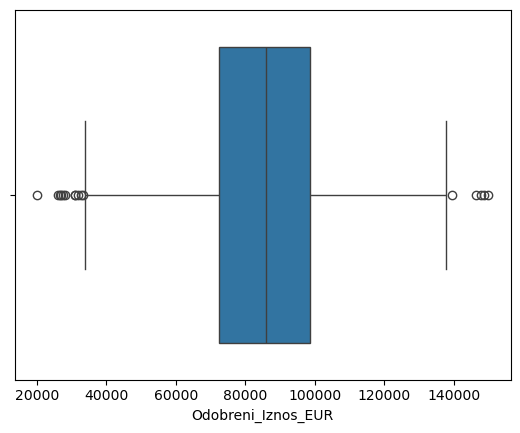

In [62]:
sns.boxplot (data = banka2, x = "Odobreni_Iznos_EUR")

In [63]:
banka2 ["Odobreni_Iznos_EUR"].sort_values (ascending=False)

209     150000.00
1615    148862.15
1957    147754.97
478     146577.62
179     139403.38
          ...    
1539     27554.76
1101     27074.89
1591     26572.99
1971     26192.23
262      20174.65
Name: Odobreni_Iznos_EUR, Length: 2008, dtype: float64

#### Iako boxplot pokazuje stršeće vrijednosti, smatram da varijablu odobrenog iznosa kredita u eurima ne treba dirati jer je su iznosi posuđenog novca realni.

<Axes: xlabel='Mjesečna_Primanje_EUR'>

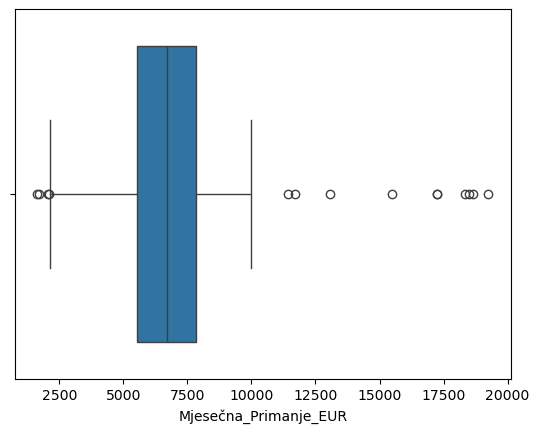

In [64]:
sns.boxplot (data = banka2, x = "Mjesečna_Primanje_EUR")

In [65]:
banka2 ["Mjesečna_Primanje_EUR"].sort_values (ascending=False)

1077    19246.942762
959     18645.758565
1678    18494.558808
1473    18342.513107
2000    17253.945264
            ...     
1562     2122.090000
671      2086.480000
1101     2055.840000
668      1703.960000
1591     1644.560000
Name: Mjesečna_Primanje_EUR, Length: 2008, dtype: float64

<Axes: xlabel='Mjesečna_Primanje_EUR'>

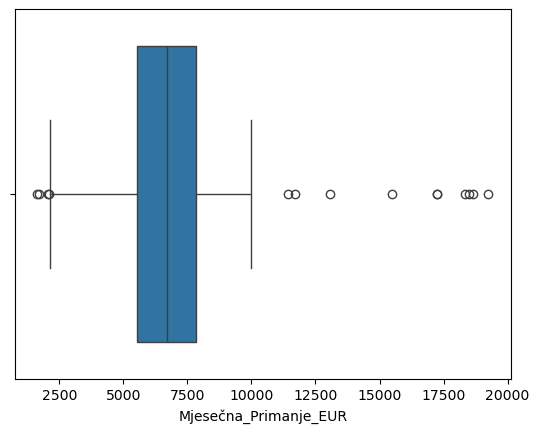

In [66]:
sns.boxplot (data = banka2, x = "Mjesečna_Primanje_EUR")

In [67]:
banka3 = banka2 ["Mjesečna_Primanje_EUR"].sort_values (ascending=False)

In [68]:
banka3.head(1500)

1077    19246.942762
959     18645.758565
1678    18494.558808
1473    18342.513107
2000    17253.945264
            ...     
1586     5579.750000
244      5578.880000
1877     5578.090000
647      5577.000000
16       5575.810000
Name: Mjesečna_Primanje_EUR, Length: 1500, dtype: float64

#### Ozbzirom da znamo da su klijenti banke svi iz Hrvatske i otprilike su nam poznate plaće u Hrvatskoj, ne bih dirala stršeće vrijednosti jer znamo da ima ljudi s vrlo malom plaćom, a također ima i menadžera, financijskih stručnjaka, IT stručnjaka i sličnih koji imaju vrlo visoke plaće. Prepostavljam da su ovi klijenti banke na visokim pozicijama u svojim tvrtkama te da imaju vrlo dobre plaće. 

<Axes: xlabel='Trenutni_Dug_EUR'>

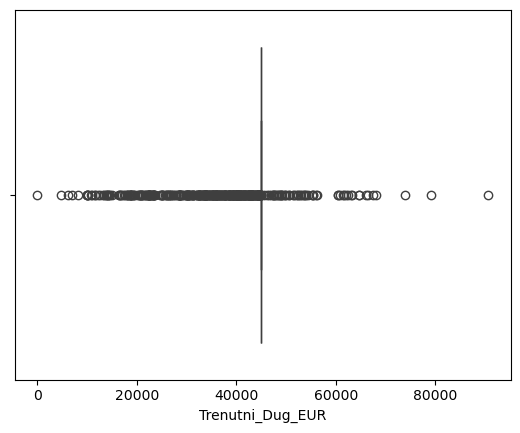

In [69]:
sns.boxplot (data = banka2, x = "Trenutni_Dug_EUR")

In [70]:
banka2 ["Trenutni_Dug_EUR"].sort_values (ascending=False)

1963    90661.461809
808     79202.868342
1418    73851.630349
374     68095.315611
1102    67406.108140
            ...     
1276     8066.360000
113      7005.270000
1491     6093.980000
1219     4704.970000
1615        0.000000
Name: Trenutni_Dug_EUR, Length: 2008, dtype: float64

#### Vrijednosti varijable trenutni dug također nisu upitne, kreću se od 0 do 90.662 eura.

<Axes: xlabel='Starost_Klijenta'>

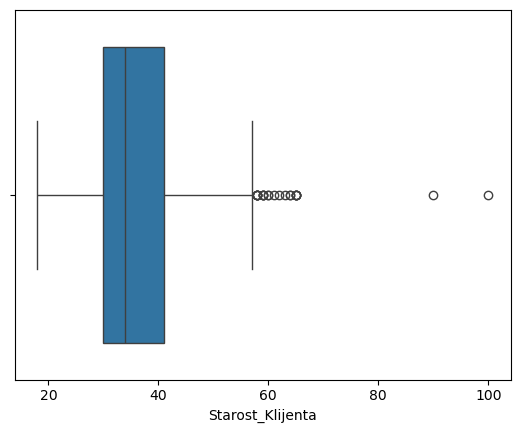

In [71]:
sns.boxplot (data = banka2, x = "Starost_Klijenta")

In [72]:
banka2 ["Starost_Klijenta"].sort_values (ascending=False)

1718    100.0
1640     90.0
521      65.0
1716     65.0
305      65.0
        ...  
884      18.0
344      18.0
24       18.0
1141     18.0
1776     18.0
Name: Starost_Klijenta, Length: 2008, dtype: float64

#### Ovdje su mi sumnjive vrijednosti od 100 i 90 godina, pretpostavka je da nema banke koja će stogodišnjaku dati kredit, tako da ću popraviti tu vrijednost.

In [73]:
banka2.loc[banka2["Starost_Klijenta"]>65,"Starost_Klijenta"]=np.nan

In [74]:
prosjek_godina = banka2["Starost_Klijenta"].mean()

In [75]:
banka2 ["Starost_Klijenta"].sort_values (ascending=False)

1716    65.0
305     65.0
521     65.0
895     65.0
1982    65.0
        ... 
24      18.0
805     18.0
1141    18.0
1640     NaN
1718     NaN
Name: Starost_Klijenta, Length: 2008, dtype: float64

In [76]:
banka2['Starost_Klijenta'] = banka2['Starost_Klijenta'].fillna(prosjek_godina)

In [77]:
banka2 ["Starost_Klijenta"].sort_values (ascending=False)

895     65.0
1716    65.0
521     65.0
305     65.0
1982    65.0
        ... 
1776    18.0
1141    18.0
805     18.0
24      18.0
1990    18.0
Name: Starost_Klijenta, Length: 2008, dtype: float64

#### Starost godina koje su stršale prvo sam postavila na NaN, a zatim sam popunila prosjekom godina ostalih vrijednosti.

<Axes: xlabel='Staž_Godine'>

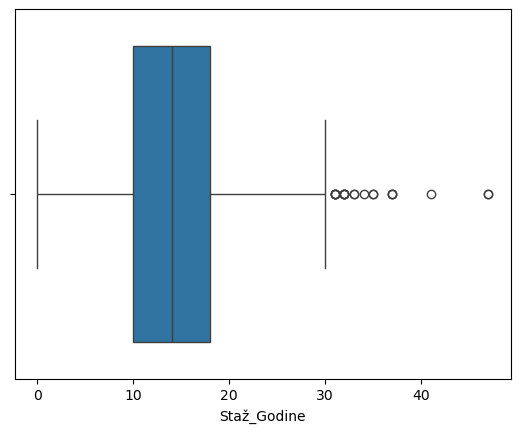

In [78]:
sns.boxplot (data = banka2, x = "Staž_Godine")

In [79]:
banka2 ["Staž_Godine"].sort_values (ascending=False)

1716    47.0
1982    47.0
471     41.0
895     37.0
242     37.0
        ... 
1776     0.0
872      0.0
884      0.0
24       0.0
1141     0.0
Name: Staž_Godine, Length: 2008, dtype: float64

#### Obzirom da se u Hrvatskoj generalno radi do 40 godina staža, veće vrrijednosti ćemo popraviti prosjekom.

In [80]:
banka2.loc[banka2["Staž_Godine"]>40,"Staž_Godine"]=np.nan

In [81]:
prosjek_staža = banka2["Staž_Godine"].mean()

In [82]:
banka2['Staž_Godine'] = banka2['Staž_Godine'].fillna(prosjek_staža)

In [83]:
banka2 ["Staž_Godine"].sort_values (ascending=False)

895     37.0
1394    37.0
242     37.0
35      35.0
1066    35.0
        ... 
1776     0.0
884      0.0
24       0.0
1990     0.0
872      0.0
Name: Staž_Godine, Length: 2008, dtype: float64

<Axes: xlabel='Godine_Kreditne_Povijesti'>

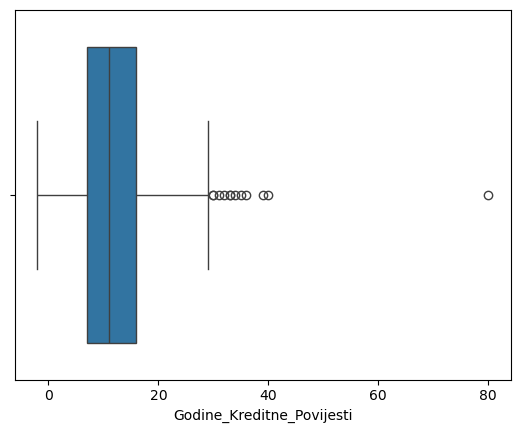

In [84]:
sns.boxplot (data = banka2, x = "Godine_Kreditne_Povijesti")

In [85]:
banka2 ["Godine_Kreditne_Povijesti"].sort_values (ascending=False)

1718    80.0
1686    40.0
544     39.0
1312    36.0
1365    35.0
        ... 
872     -2.0
1141    -2.0
24      -2.0
1990    -2.0
884     -2.0
Name: Godine_Kreditne_Povijesti, Length: 2008, dtype: float64

#### Obzirom da godine moraju biti pozitivna vrijednost, na što god se odnosile, tako ćemo popraviti vrijednosti godina kreditne povijesti koje su negativne i ove od 40 i 80 godina jer nisu logične, NaN ću popuniti prosječnom vrijednosti.

In [86]:
banka2.loc[banka2["Godine_Kreditne_Povijesti"]>36,"Godine_Kreditne_Povijesti"]=np.nan

In [87]:
banka2.loc[banka2["Godine_Kreditne_Povijesti"]<0,"Godine_Kreditne_Povijesti"]=np.nan

In [88]:
banka2 ["Godine_Kreditne_Povijesti"].sort_values (ascending=False)

1312    36.0
1365    35.0
1582    34.0
1066    33.0
1215    33.0
        ... 
1141     NaN
1686     NaN
1718     NaN
1776     NaN
1990     NaN
Name: Godine_Kreditne_Povijesti, Length: 2008, dtype: float64

In [89]:
prosjek_kreditna_povijest = banka2["Godine_Kreditne_Povijesti"].mean()

In [90]:
banka2['Godine_Kreditne_Povijesti'] = banka2['Godine_Kreditne_Povijesti'].fillna(prosjek_kreditna_povijest)

In [91]:
banka2 ["Godine_Kreditne_Povijesti"].sort_values (ascending=False)

1312    36.0
1365    35.0
1582    34.0
1066    33.0
1215    33.0
        ... 
1430     0.0
1699     0.0
1441     0.0
722      0.0
67       0.0
Name: Godine_Kreditne_Povijesti, Length: 2008, dtype: float64

<Axes: xlabel='Broj_članova_Kućanstva'>

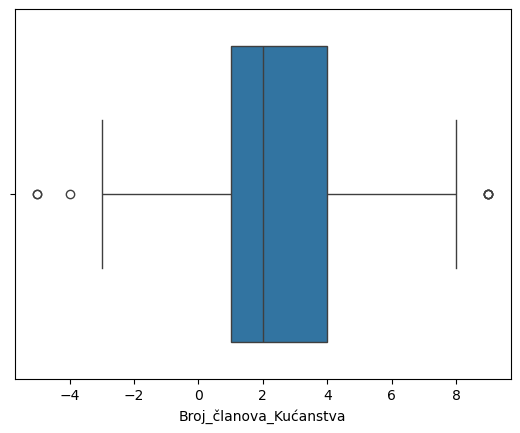

In [92]:
sns.boxplot (data = banka2, x = "Broj_članova_Kućanstva")

#### Broj članova kućanstva ne može biti manji od 1 jer tada ne bi postojalo kućanstvo, ispraviti ću vrijednosti koje su manje od 1, također ću uzeti prosjek.

In [93]:
banka2.loc[banka2["Broj_članova_Kućanstva"]<1,"Broj_članova_Kućanstva"]=np.nan

In [94]:
banka2 ["Broj_članova_Kućanstva"].sort_values (ascending=False)

28      9.0
1092    9.0
900     9.0
1333    9.0
977     8.0
       ... 
45      NaN
46      NaN
545     NaN
810     NaN
932     NaN
Name: Broj_članova_Kućanstva, Length: 2008, dtype: float64

In [95]:
članovi_kućanstva = banka2["Broj_članova_Kućanstva"].mean()

In [96]:
banka2['Broj_članova_Kućanstva'] = banka2['Broj_članova_Kućanstva'].fillna(članovi_kućanstva)

In [97]:
banka2 ["Broj_članova_Kućanstva"].sort_values (ascending=False)

28      9.0
1092    9.0
900     9.0
1333    9.0
1250    8.0
       ... 
1545    1.0
1244    1.0
524     1.0
1243    1.0
1560    1.0
Name: Broj_članova_Kućanstva, Length: 2008, dtype: float64

In [98]:
banka2.describe()

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva
count,2008.00000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000
mean,2000.37749,85909.590832,6695.732916,43155.291518,35.885842,14.468828,11.435872,2.576635
std,577.05547,19751.021570,1790.626144,6774.565248,8.273684,6.030288,6.566239,1.550188
min,1001.00000,20174.650000,1644.560000,0.000000,18.000000,0.000000,0.000000,1.000000
25%,1501.75000,72574.040000,5551.172500,45000.000000,30.000000,10.000000,7.000000,1.000000
50%,2001.50000,85893.835000,6695.732916,45000.000000,34.000000,14.000000,11.000000,2.000000
75%,2499.25000,98722.072500,7852.735000,45000.000000,41.000000,18.000000,16.000000,4.000000
max,3000.00000,150000.000000,19246.942762,90661.461809,65.000000,37.000000,36.000000,9.000000


#### Smatram da nema više (jako) sumnjivih vrijednosti

# Provjera povezanosti brojčanih podataka

In [99]:
banka2.corr(numeric_only=True)

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva
ID_Klijenta,1.000000,0.026993,0.015271,-0.001061,0.009008,-0.003436,-0.000638,0.039285
Odobreni_Iznos_EUR,0.026993,1.000000,0.655815,-0.140383,0.003434,0.073177,0.022793,0.036292
Mjesečna_Primanje_EUR,0.015271,0.655815,1.000000,-0.090360,0.021249,0.064693,0.034372,0.039162
Trenutni_Dug_EUR,-0.001061,-0.140383,-0.090360,1.000000,-0.013752,-0.028709,-0.034666,0.029874
Starost_Klijenta,0.009008,0.003434,0.021249,-0.013752,1.000000,0.893265,0.509961,0.008898
Staž_Godine,-0.003436,0.073177,0.064693,-0.028709,0.893265,1.000000,0.490504,0.002434
Godine_Kreditne_Povijesti,-0.000638,0.022793,0.034372,-0.034666,0.509961,0.490504,1.000000,0.005471
Broj_članova_Kućanstva,0.039285,0.036292,0.039162,0.029874,0.008898,0.002434,0.005471,1.000000


<Axes: >

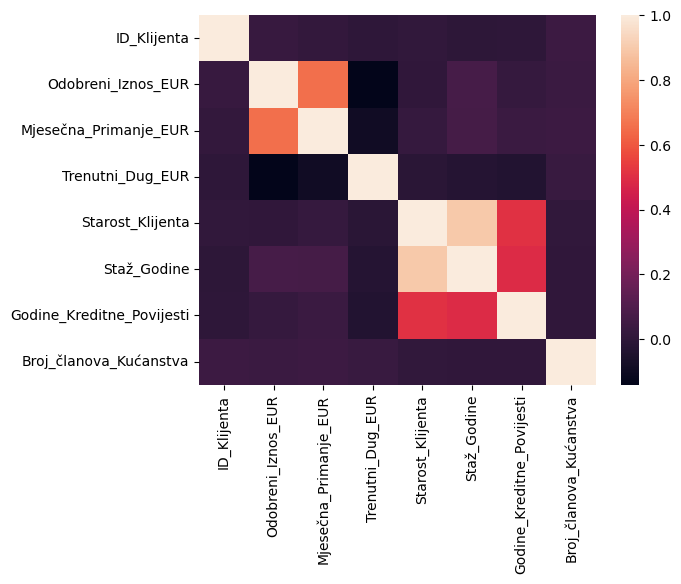

In [100]:
sns.heatmap(banka2.corr(numeric_only=True))

#### Iz gornjih prikaza vidimo da je najveća korelacija između godina staža i starosti klijenta, također je vrlo visoka ovisnost mjesečnih primanja i odobrenog iznosa kredita. Slijedi utjecaj godina kreditne povijesti i starosti klijenta, odnosno godina staža. Ono što bih zamijetila je da trenutni dug i odobreni iznos kredita gotovo uopće nemaju utjecaj jedan na drugi, što mi nikako nije logično.

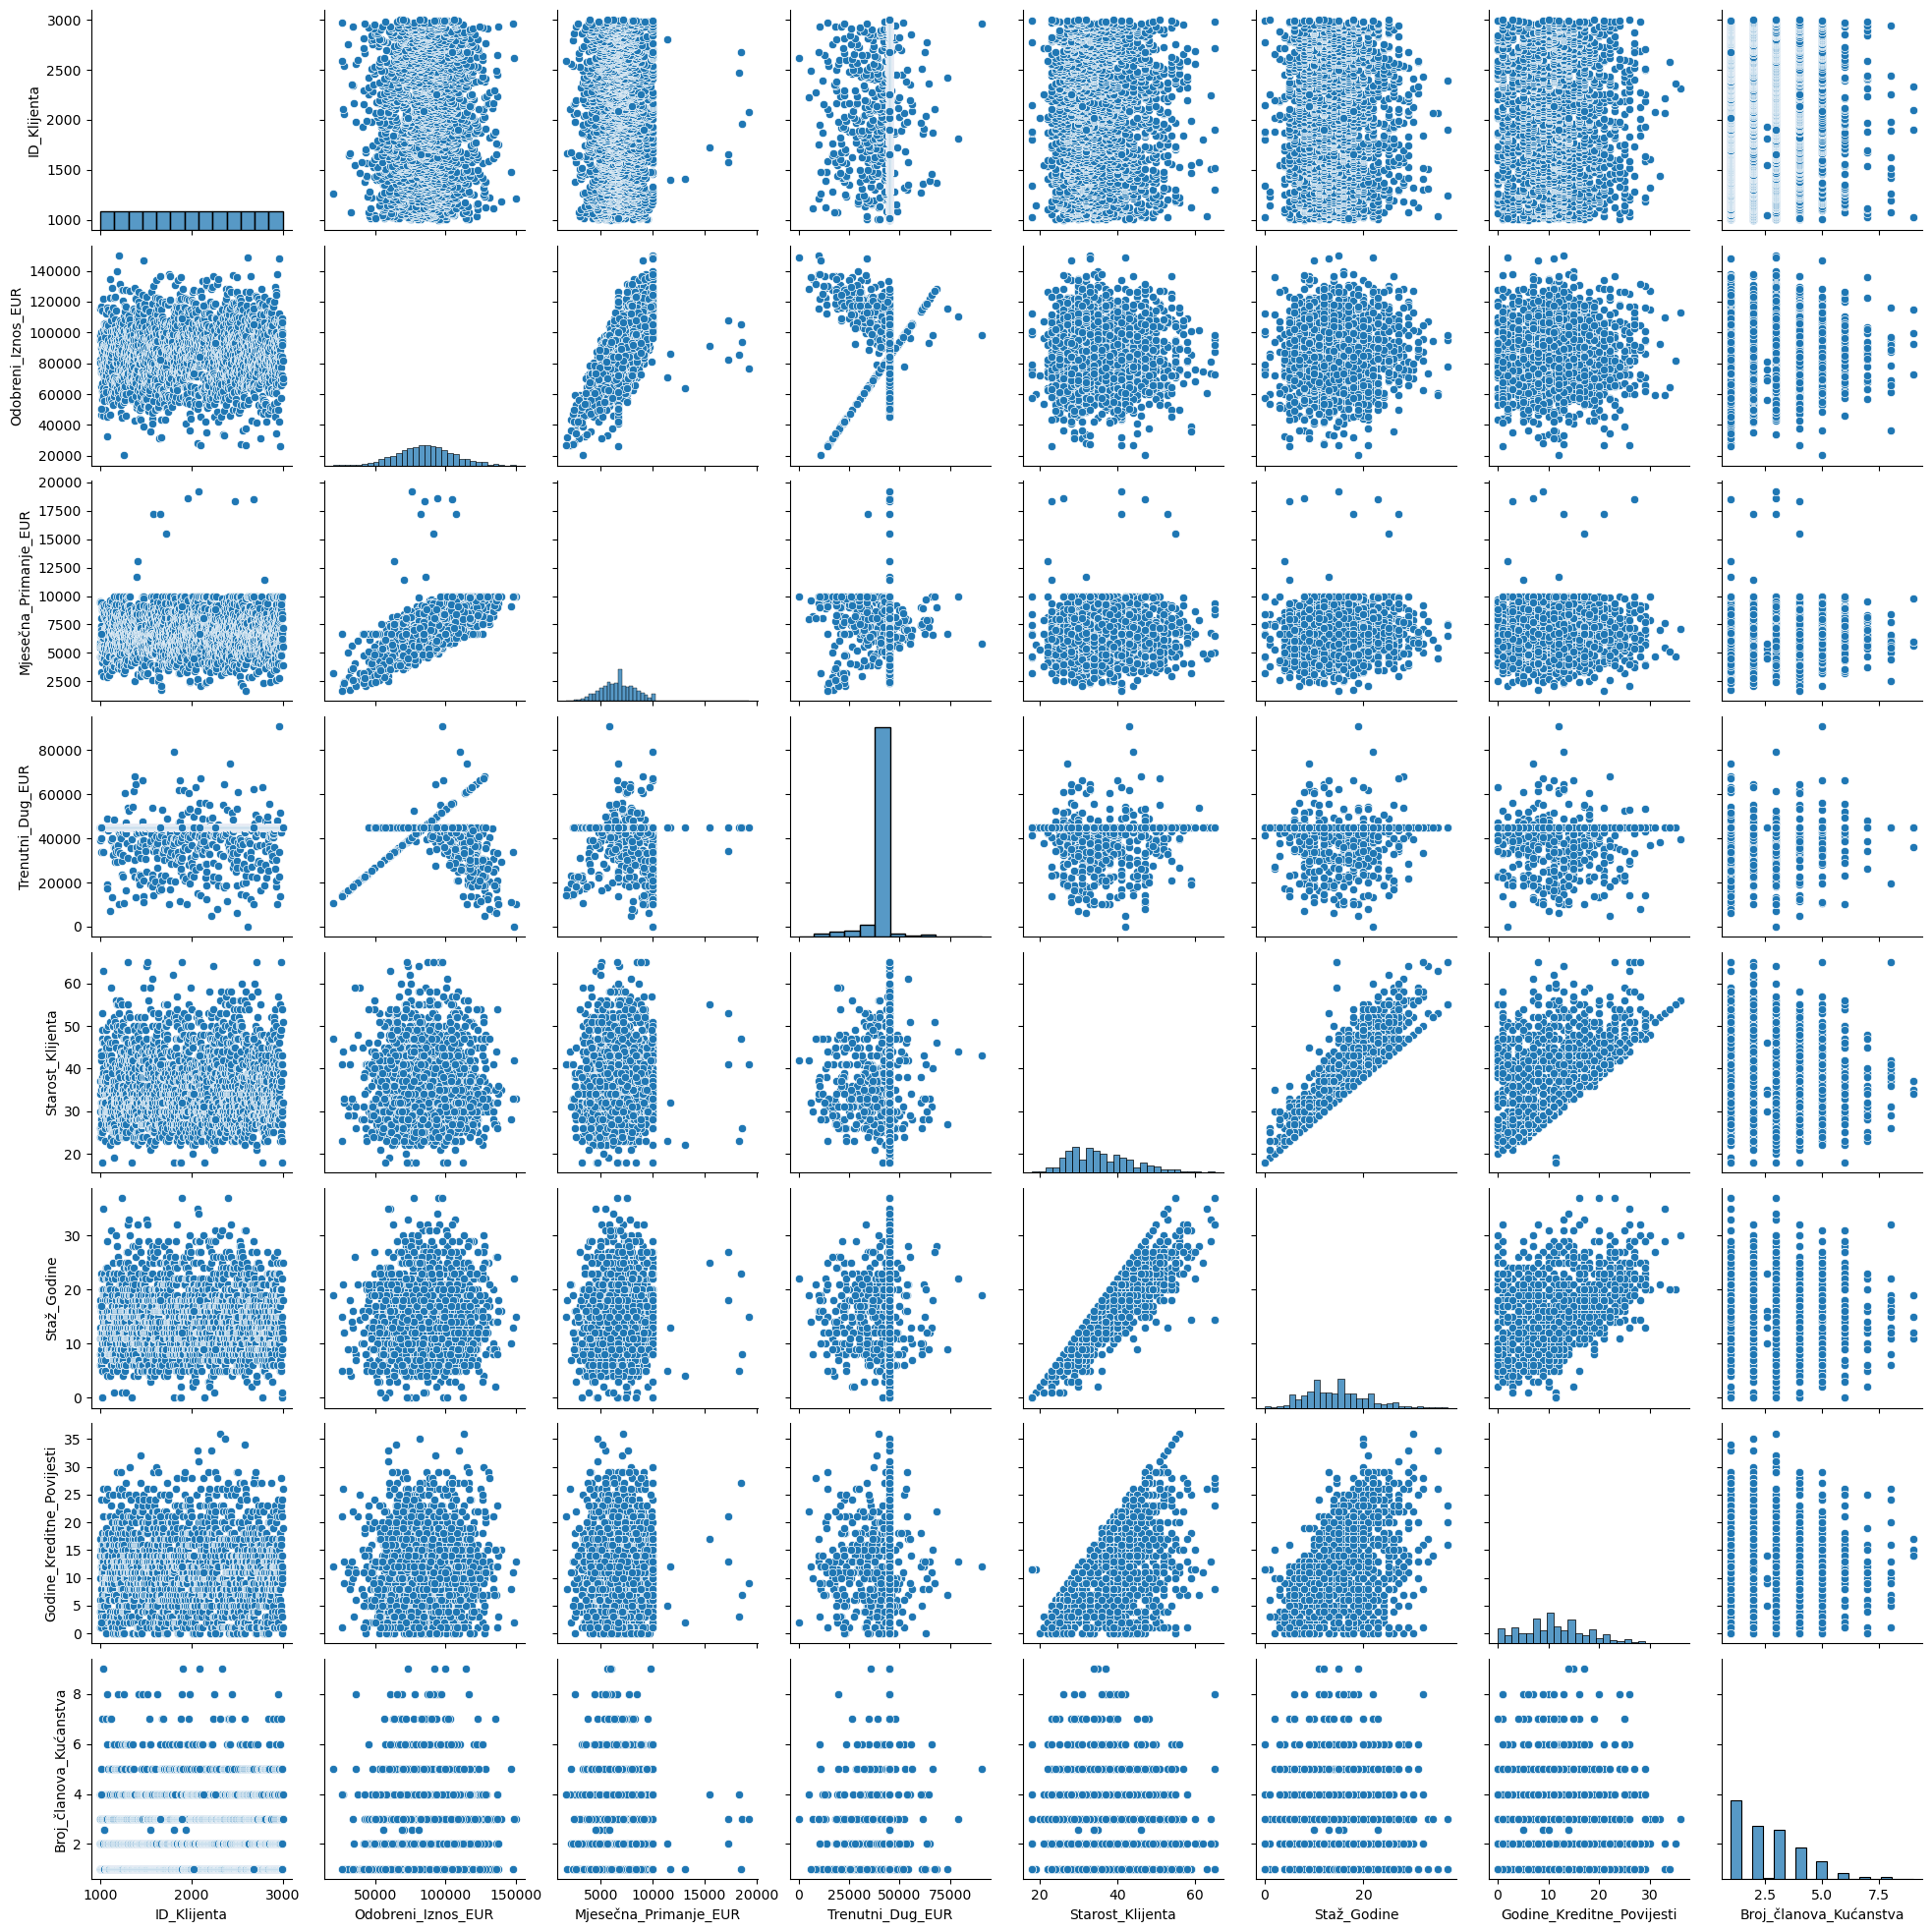

In [101]:
sns.pairplot(banka2)

## Iz dataseta mičem varijablu država jer nam taj podatak ništa ne govori i nema nikakav utjecaj u analizi.

In [102]:
banka2.drop(columns=['Država'], inplace=True)

In [103]:
banka2

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
0,1001,94934.28,5897.210000,45000.00,26.0,8.0,6.0,2.0,M,podstanar,SSS
1,1002,82234.71,5466.710000,45000.00,34.0,13.0,14.0,3.0,Ž,podstanar,SSS
2,1003,97953.77,9539.260000,45000.00,30.0,11.0,10.0,2.0,M,podstanar,VSS
3,1004,115460.60,9433.690000,39059.44,37.0,17.0,17.0,4.0,Ž,podstanar,VSS
4,1005,80316.93,4671.030000,45000.00,24.0,6.0,4.0,2.0,Ž,podstanar,SSS
...,...,...,...,...,...,...,...,...,...,...,...
2007,2022,73526.00,4534.170000,45000.00,34.0,16.0,14.0,1.0,M,podstanar,SSS
2009,2133,117274.23,8014.600000,38649.07,31.0,9.0,11.0,4.0,Ž,vlasnik,SSS
2011,1015,50501.64,6695.732916,45000.00,43.0,17.0,2.0,4.0,Ž,vlasnik,SSS
2014,2258,93380.38,8856.010000,45000.00,28.0,9.0,0.0,4.0,M,podstanar,SSS


Text(0.5, 1.0, 'Mjesečna primanja po spolu')

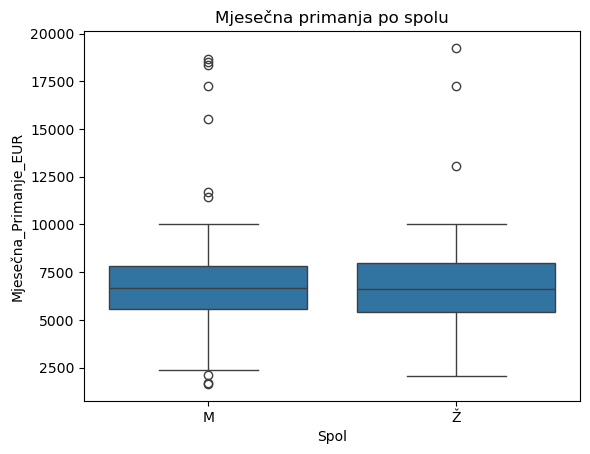

In [104]:
sns.boxplot(data=banka2, x="Spol", y="Mjesečna_Primanje_EUR")
plt.title("Mjesečna primanja po spolu")

Text(0.5, 1.0, 'Starost klijenata po spolu')

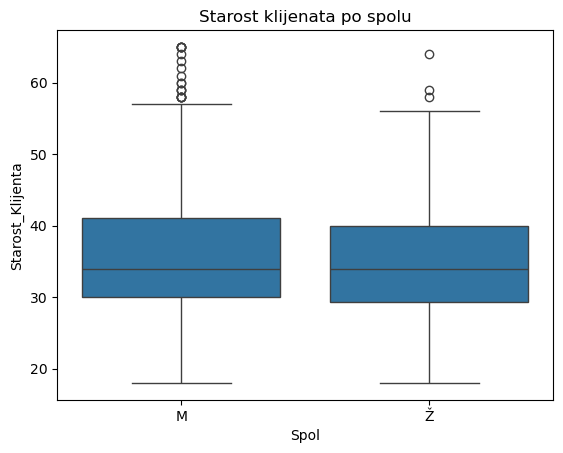

In [105]:
sns.boxplot(data=banka2, x="Spol", y="Starost_Klijenta")
plt.title("Starost klijenata po spolu")

Text(0.5, 1.0, 'Odobreni iznos kredita po spolu')

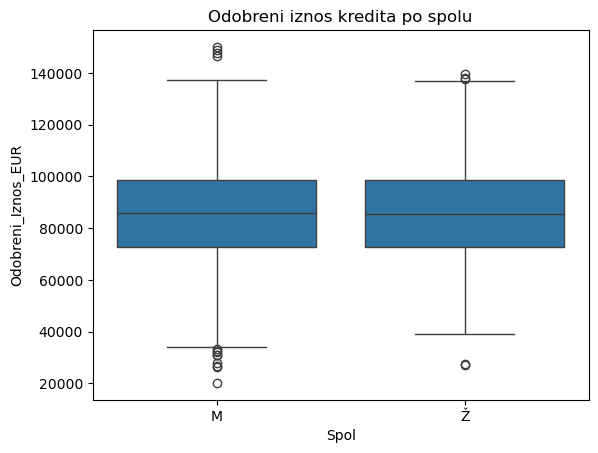

In [106]:
sns.boxplot(data=banka2, x="Spol", y="Odobreni_Iznos_EUR")
plt.title("Odobreni iznos kredita po spolu")

## Spol također nema utjecaj na podatke i analizu te ga također možemo maknuti iz dataseta

In [107]:
banka2.drop(columns=['Spol'], inplace=True)

In [108]:
banka2

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Stambeni_Status,Obrazovanje
0,1001,94934.28,5897.210000,45000.00,26.0,8.0,6.0,2.0,podstanar,SSS
1,1002,82234.71,5466.710000,45000.00,34.0,13.0,14.0,3.0,podstanar,SSS
2,1003,97953.77,9539.260000,45000.00,30.0,11.0,10.0,2.0,podstanar,VSS
3,1004,115460.60,9433.690000,39059.44,37.0,17.0,17.0,4.0,podstanar,VSS
4,1005,80316.93,4671.030000,45000.00,24.0,6.0,4.0,2.0,podstanar,SSS
...,...,...,...,...,...,...,...,...,...,...
2007,2022,73526.00,4534.170000,45000.00,34.0,16.0,14.0,1.0,podstanar,SSS
2009,2133,117274.23,8014.600000,38649.07,31.0,9.0,11.0,4.0,vlasnik,SSS
2011,1015,50501.64,6695.732916,45000.00,43.0,17.0,2.0,4.0,vlasnik,SSS
2014,2258,93380.38,8856.010000,45000.00,28.0,9.0,0.0,4.0,podstanar,SSS


Text(0.5, 1.0, 'Mjesečna primanja po stupnju obrazovanja')

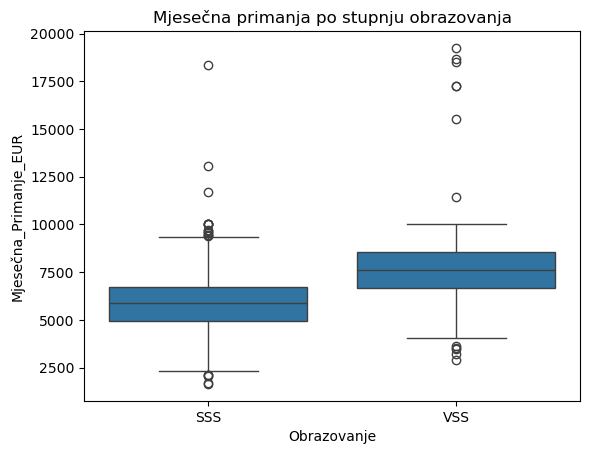

In [109]:
sns.boxplot(data=banka2, x="Obrazovanje", y="Mjesečna_Primanje_EUR")
plt.title("Mjesečna primanja po stupnju obrazovanja")

#### Osobe s višim stupnjem obrazovanja imaju veća primanja

Text(0.5, 1.0, 'Odobreni iznos kredita po stupnju obrazovanja')

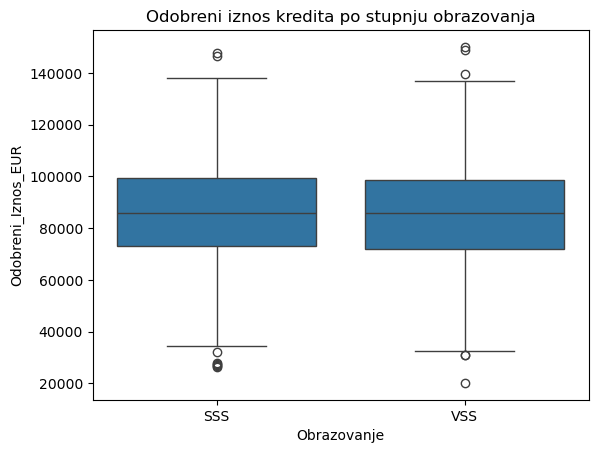

In [110]:
sns.boxplot(data=banka2, x="Obrazovanje", y="Odobreni_Iznos_EUR")
plt.title("Odobreni iznos kredita po stupnju obrazovanja")

#### Stupanj obrazovanja nema velik utjecaj na količinu zaduženja.

In [112]:
!jupyter nbconvert --to html "Projekt_banka.ipynb"

[NbConvertApp] Converting notebook Projekt_banka.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 668022 bytes to Projekt_banka.html
